# Bike Project 


Seoul Bike Sharing Demand Data Set
Download: Data Folder, Data Set Description

Abstract: The dataset contains count of public bikes rented at each hour in Seoul Bike haring System with the corresponding Weather data and Holidays information

Data Set Characteristics:  

Multivariate

Number of Instances:

8760

Area:

Computer

Attribute Characteristics:

Integer, Real

Number of Attributes:

14

Date Donated

2020-03-01

Associated Tasks:

Regression

Missing Values?

N/A

Number of Web Hits:

88518


Source:

Data Source :http://data.seoul.go.kr/
SOUTH KOREA PUBLIC HOLIDAYS. URL: publicholidays.go.kr


Data Set Information:

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.
The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.


Attribute Information:

Date : year-month-day
Rented Bike count - Count of bikes rented at each hour
Hour - Hour of he day
Temperature-Temperature in Celsius
Humidity - %
Windspeed - m/s
Visibility - 10m
Dew point temperature - Celsius
Solar radiation - MJ/m2
Rainfall - mm
Snowfall - cm
Seasons - Winter, Spring, Summer, Autumn
Holiday - Holiday/No holiday
Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler 
import copy
import seaborn as sns 
import tensorflow as tf
from sklearn.linear_model import LinearRegression

In [2]:
#read dataframe of dataset
df = pd.read_csv('SeoulBikeData.csv', encoding='latin1')
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [3]:
dataset_cols =['Bike_count','Hour','Temp','Humidity','Windspeed','Visibility','Dew_point_temp','Solar_Radiation','Rainfall', 'Snowfall','Functional']

In [4]:
df = df.drop(['Date', 'Holiday', 'Seasons'], axis=1)

In [5]:
df.columns = dataset_cols

In [6]:
df['Functional'] = (df['Functional']=='Yes').astype(int)

In [7]:
#lets keep it simple and drop the hour after we use the 12 hour 
df = df[df['Hour']==12]

In [8]:
df = df.drop(['Hour'],axis=1)

In [9]:
df.head()

,Bike_count,Temp,Humidity,Windspeed,Visibility,Dew_point_temp,Solar_Radiation,Rainfall,Snowfall,Functional
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


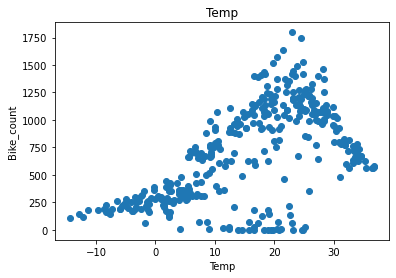

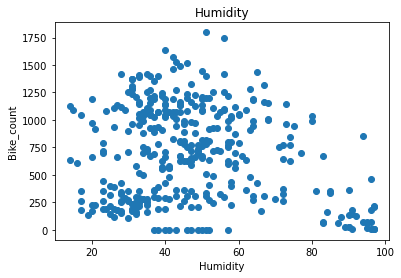

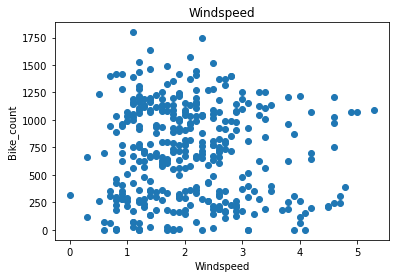

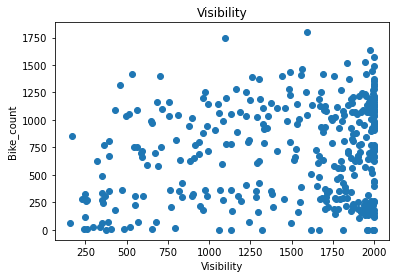

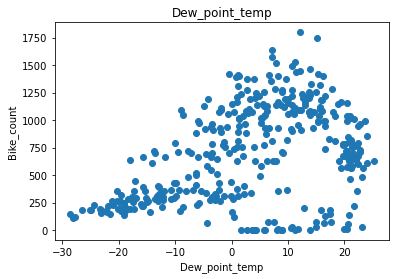

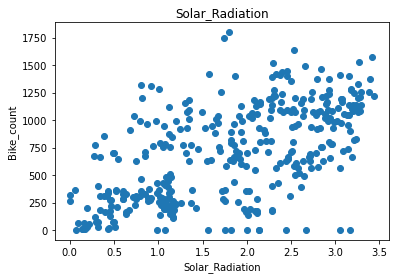

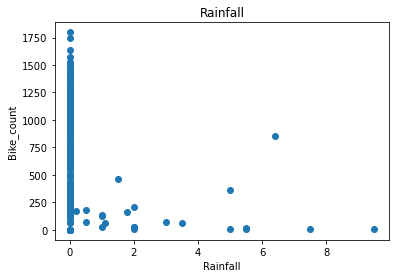

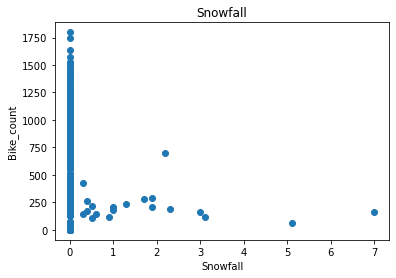

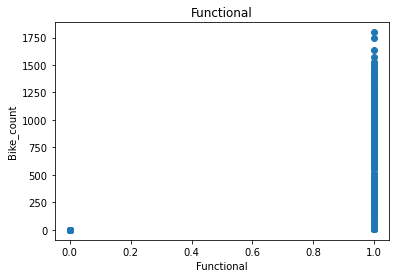

In [10]:
#plot 
for label in df.columns[1:]:
    plt.scatter(df[label], df['Bike_count'])
    plt.title(label)
    plt.ylabel('Bike_count')
    plt.xlabel(label)
    plt.show()
    

>>> Temperature and solarradiation seems to be linear

In [11]:
#lets confirm this using correlation 
df.corr()['Bike_count'].sort_values()

Rainfall          -0.247522
Snowfall          -0.198729
Humidity          -0.188074
Windspeed         -0.027523
Visibility         0.188548
Functional         0.299803
Dew_point_temp     0.409699
Temp               0.575211
Solar_Radiation    0.597940
Bike_count         1.000000
Name: Bike_count, dtype: float64

In [12]:
#drop some columns that i will not be working with
df= df.drop(['Windspeed', 'Visibility', 'Functional'], axis =1 )

In [13]:
#train data set
import numpy as np

In [35]:
train, valid, test = np.split(df.sample(frac=1),[int(0.6*len(df)), int(0.8*len(df))])

In [40]:
def get_Xy(dataframe, y_label, x_labels=None):
    dataframe = copy.deepcopy(dataframe)
    if x_labels is None:
        #extract X
        X = dataframe[[c for c in dataframe.columns if c!=y_label]].values
    else:
        if len(x_labels)== 1:
            X= dataframe[x_labels[0]].values.reshape(-1,1)
        else:
            X=dataframe[x_labels].values
            #extract y
        y=dataframe[y_label].values.reshape(-1,1)
        data=np.hstack((X,y))
    return data, X, y

In [41]:
#using temp to predict y 
_, X_train_temp, y_train_temp = get_Xy(train, 'Bike_count', x_labels =['Temp'])
_, X_valid_temp, y_valid_temp = get_Xy(valid, 'Bike_count', x_labels =['Temp'])
_, X_test_temp, y_test_temp = get_Xy(test, 'Bike_count', x_labels =['Temp'])

In [42]:
#model
temp_lr = LinearRegression()
#fit
temp_lr.fit(X_train_temp, y_train_temp)

LinearRegression()

In [43]:
#coefficients 
print(temp_lr.coef_, temp_lr.intercept_)

[[20.66349099]] [364.23365957]


In [44]:
#accuracy 
temp_lr.score(X_test_temp, y_test_temp)

0.46154081717135476

> model is doing bad

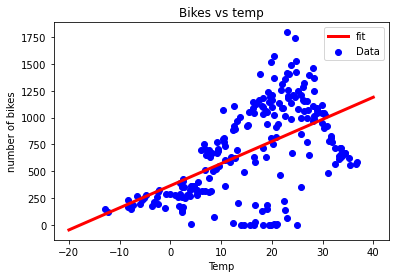

In [45]:
#plot a line of best fit 
plt.scatter(X_train_temp, y_train_temp, label='Data', color='blue')
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_lr.predict(np.array(x).reshape(-1,1)), label='fit', color='red', linewidth=3)
plt.ylabel('number of bikes')
plt.xlabel('Temp')
plt.title('Bikes vs temp')
plt.legend()
plt.show()

# Multiple Regression

In [46]:
train, valid, test = np.split(df.sample(frac=1),[int(0.6*len(df)), int(0.8*len(df))])
_, X_train_all, y_train_all = get_Xy(train, 'Bike_count', x_labels =df.columns[1:])
_, X_valid_all, y_valid_all = get_Xy(valid, 'Bike_count', x_labels =df.columns[1:])
_, X_test_all, y_test_all = get_Xy(test, 'Bike_count', x_labels =df.columns[1:])

In [32]:
df.columns

Index(['Bike_count', 'Temp', 'Humidity', 'Dew_point_temp', 'Solar_Radiation',
       'Rainfall', 'Snowfall'],
      dtype='object')

In [48]:
#model 
all_lr = LinearRegression()
#fit the model 
all_lr.fit(X_test_all,y_test_all)

LinearRegression()

In [49]:
#score 
all_lr.score(X_test_all, y_test_all)

0.5421486233463602

> model has improved this is really good